In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
import random as rnd

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Bilder laden

dataset = datasets.cifar10.load_data()
#(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()


In [3]:
dataset = np.load(r'data/images/augmented/augmentation.npy', allow_pickle=True)

images = []
labels = []

for idx, d in enumerate(dataset):
    images.extend(d)
    for e in d:
        labels.append([idx])

In [4]:
images = np.array(images)
labels = np.array(labels)

In [5]:
p = np.random.permutation(len(images))
images = images[p]
labels = labels[p]

In [6]:
ratio = 0.5

train_images, train_labels = images[:int(len(images)*ratio)], labels[:int(len(images)*ratio)]
test_images, test_labels = images[int(len(images)*ratio):], labels[int(len(images)*ratio):]

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (2, 2), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(4))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 5, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 1, 1, 256)         1

In [9]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, batch_size=32, shuffle=True, use_multiprocessing=False,
                    validation_data=(test_images, test_labels), validation_split=0.5)

Epoch 1/5
29723/29723 [==============================] - 372s 13ms/step - loss: 0.7655 - accuracy: 0.7047 - val_loss: 0.5760 - val_accuracy: 0.7844
Epoch 2/5
29723/29723 [==============================] - 372s 13ms/step - loss: 0.5120 - accuracy: 0.8112 - val_loss: 0.4758 - val_accuracy: 0.8269
Epoch 3/5
29723/29723 [==============================] - 375s 13ms/step - loss: 0.4718 - accuracy: 0.8276 - val_loss: 0.4251 - val_accuracy: 0.8458
Epoch 4/5
29723/29723 [==============================] - 366s 12ms/step - loss: 0.5164 - accuracy: 0.8235 - val_loss: 0.4230 - val_accuracy: 0.8500
Epoch 5/5
29723/29723 [==============================] - 368s 12ms/step - loss: 0.4688 - accuracy: 0.8318 - val_loss: 0.4600 - val_accuracy: 0.8429


59445/59445 - 164s - loss: 0.4590 - accuracy: 0.8438


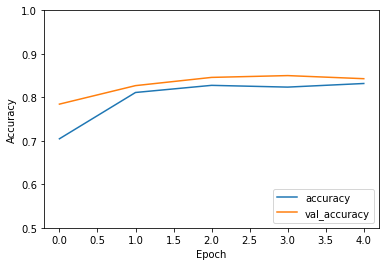

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

In [11]:
print(test_acc)

0.8438108563423157


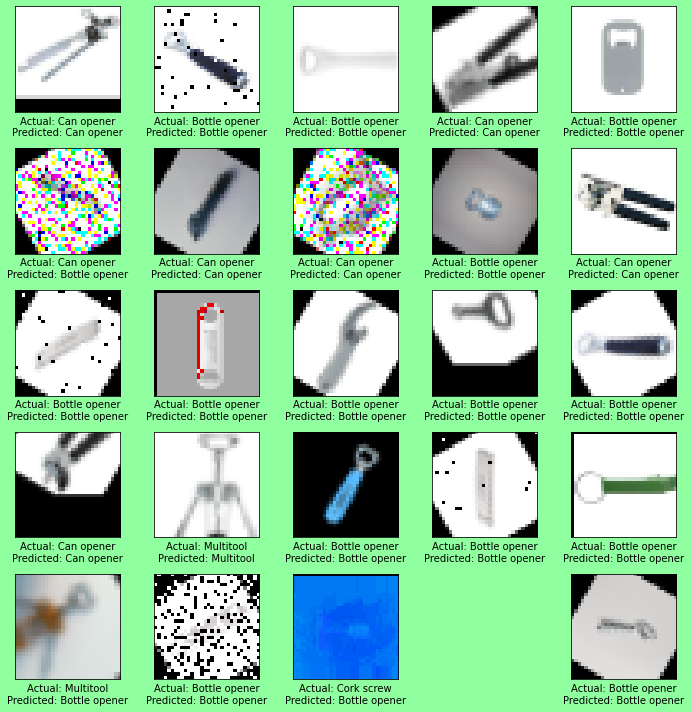

In [12]:
class_names = ['Bottle opener', 'Can opener', 'Cork screw', 'Multitool']
start = rnd.randint(0, len(test_images) - 25)

preds = model.predict(test_images[start:start+25])
index_max = []
for pred in preds:
    index_max.append(np.argmax(pred))

fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('xkcd:mint green')
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i+start])
    plt.tight_layout()
    plt.xlabel(
        'Actual: ' + class_names[test_labels[i+start][0]] +
        '\nPredicted: ' + class_names[index_max[i]])

In [13]:
model.save('models/v2')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: models/v2\assets


In [3]:
model = tf.keras.models.load_model('models/v2')

In [14]:
original = np.load(r'data/images/augmented/original.npy', allow_pickle=True)

In [15]:
original_images = []
original_labels = []

for idx, d in enumerate(original):
    original_images.extend(d)
    for e in d:
        original_labels.append([idx])

In [16]:
original_images = np.array(original_images)
original_labels = np.array(original_labels)

p = np.random.permutation(len(original_images))
original_images = original_images[p]
original_labels = original_labels[p]

In [17]:
test_loss, test_acc = model.evaluate(original_images, original_labels, verbose=1)

23/23 [==============================] - 0s 3ms/step - loss: 0.0383 - accuracy: 0.9903


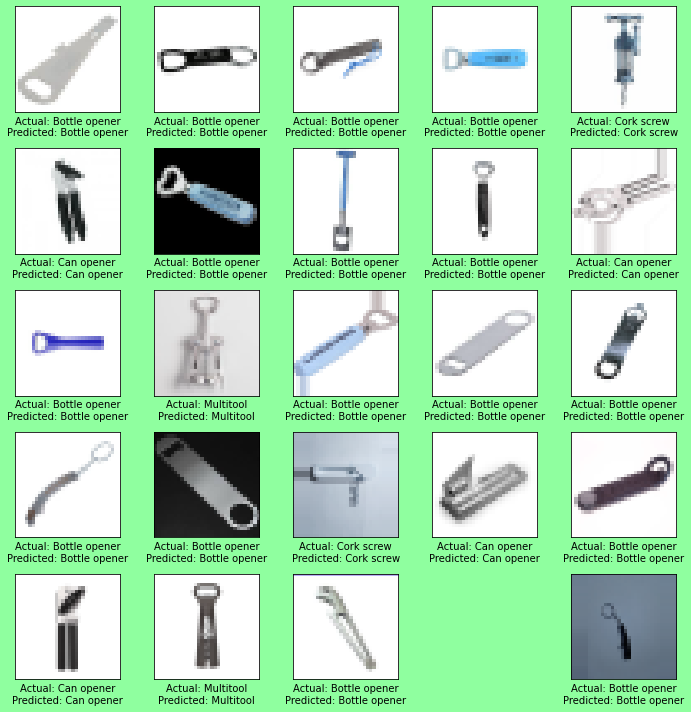

In [26]:
class_names = ['Bottle opener', 'Can opener', 'Cork screw', 'Multitool']
start = rnd.randint(0, len(original_images) - 25)

preds = model.predict(original_images[start:start+25])
index_max = []
for pred in preds:
    index_max.append(np.argmax(pred))

fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor('xkcd:mint green')
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(original_images[i+start])
    plt.tight_layout()
    plt.xlabel(
        'Actual: ' + class_names[original_labels[i+start][0]] +
        '\nPredicted: ' + class_names[index_max[i]])

Is your specified object a "Bottle opener"?


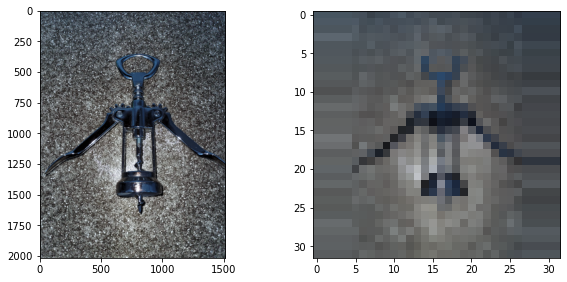

In [28]:
from DataAugmentation import resizeAndPad
import cv2

class_names = ['Bottle opener', 'Can opener', 'Cork screw', 'Multitool']
file_actual = cv2.imread(r'data/test/test5.jpg', cv2.COLOR_BGR2RGB)
file = resizeAndPad(file_actual, (32, 32))

prediction = model.predict(np.array([file]))
index_max = np.argmax(prediction)

plt.figure(figsize=(10, 10))
plt.grid(False)
plt.subplot(2, 2, 1)
plt.imshow(file_actual)
plt.subplot(2, 2, 2)
plt.imshow(file)

print ('Is your specified object a "{}"?'.format(class_names[index_max]))